In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import starfile

In [42]:
input_tomo_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/tomogram_info.star") #/mnt/scratch/ribosomes/kas_k44a/relion_full/CtfRefineTomo/estimate_ice/tomograms.star")
input_ribosome_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/Class3D/job250/good_classes.star")

tomo_df = starfile.read(input_tomo_star)
ribosome_df = starfile.read(input_ribosome_star)["particles"]
print(tomo_df.columns)
print(ribosome_df.columns)


Index(['rlnTomoName', 'rlnTomoTiltSeriesName', 'rlnTomoFrameCount',
       'rlnTomoSizeX', 'rlnTomoSizeY', 'rlnTomoSizeZ', 'rlnTomoHand',
       'rlnOpticsGroupName', 'rlnTomoTiltSeriesPixelSize', 'rlnVoltage',
       'rlnSphericalAberration', 'rlnAmplitudeContrast',
       'rlnTomoImportFractionalDose', 'rlnTomoRelativeLuminance',
       'rlnTomoRelativeIceThickness', 'rlnTomoIceNormalX', 'rlnTomoIceNormalY',
       'rlnTomoIceNormalZ', 'TomoThicknessNm', 'TomoThicknessStddevNm'],
      dtype='object')
Index(['rlnTomoName', 'rlnCoordinateX', 'rlnCoordinateY', 'rlnCoordinateZ',
       'rlnAngleRot', 'rlnAngleTilt', 'rlnAnglePsi', 'rlnOriginXAngst',
       'rlnOriginYAngst', 'rlnOriginZAngst', 'rlnObjectNumber',
       'rlnRandomSubset', 'rlnOpticsGroup', 'rlnClassNumber',
       'rlnNormCorrection', 'rlnLogLikeliContribution',
       'rlnMaxValueProbDistribution', 'rlnNrOfSignificantSamples',
       'rlnGroupNumber', 'rlnTomoParticleName', 'rlnImageName', 'rlnCtfImage'],
      dtype='o

In [43]:
# If a row in ribosome_df has a tomo name that is in tomo_df, then add the thickness to the ribosome_df

for i, row in ribosome_df.iterrows():
    tomo_name = row["rlnTomoName"]
    if tomo_name in tomo_df["rlnTomoName"].values:
        tomo_thickness = tomo_df[tomo_df["rlnTomoName"] == tomo_name]["TomoThicknessNm"].values[0]
        ribosome_df.loc[i, "TomoThicknessNm"] = tomo_thickness

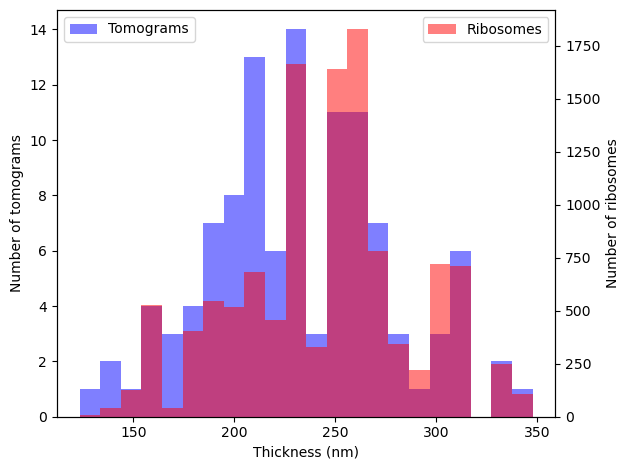

In [44]:
x1_data = np.arange(len(tomo_df["rlnTomoName"].index)) + 1
y1_data = tomo_df["TomoThicknessNm"]
dy1_data = tomo_df["TomoThicknessStddevNm"]
x2_data = np.arange(len(ribosome_df["rlnObjectNumber"].index)) + 1
y2_data = ribosome_df["TomoThicknessNm"]

# plot two histograms on the same plot

fig, ax1 = plt.subplots()
ax1.set_xlabel("Thickness (nm)")
ax1.set_ylabel("Number of tomograms")
ax1.hist(y1_data, bins=22, alpha=0.5, label="Tomograms", color="blue")
ax1.legend(loc="upper left")
ax2 = ax1.twinx()
ax2.hist(y2_data, bins=22, alpha=0.5, label="Ribosomes", color="red")
ax2.set_ylabel("Number of ribosomes")
ax2.legend(loc="upper right")
fig.tight_layout()
plt.show()

In [45]:
y2_data.count()

11934

(100.0, 400.0)

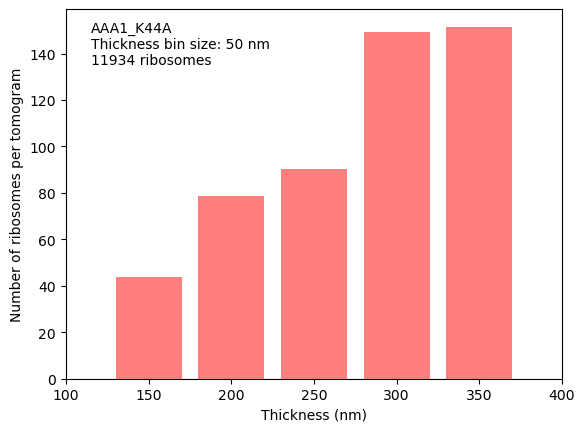

In [46]:
# in bins of 10 nm thickness, plot the number of ribosomes per tomogram

bin_size = 50
max_thickness = 400
tomo_thickness_bins = np.arange(0, max_thickness, bin_size)

tomo_thickness_bin_counts = np.zeros(len(tomo_thickness_bins) - 1)
for i in range(len(tomo_thickness_bins) - 1):
    tomo_thickness_bin_counts[i] = len(tomo_df[(tomo_df["TomoThicknessNm"] >= tomo_thickness_bins[i]) &
                                               (tomo_df["TomoThicknessNm"] < tomo_thickness_bins[i + 1])].index)
    
ribosome_thickness_bin_counts = np.zeros(len(tomo_thickness_bins) - 1)
for i in range(len(tomo_thickness_bins) - 1):
    ribosome_thickness_bin_counts[i] = len(ribosome_df[(ribosome_df["TomoThicknessNm"] >= tomo_thickness_bins[i]) &
                                                       (ribosome_df["TomoThicknessNm"] < tomo_thickness_bins[i + 1])].index)

# divide the number of ribosomes by the number of tomograms in each bin
for i in range(len(tomo_thickness_bins) - 1):
    if tomo_thickness_bin_counts[i] != 0:
        ribosome_thickness_bin_counts[i] = ribosome_thickness_bin_counts[i] / tomo_thickness_bin_counts[i]

fig, ax1 = plt.subplots()
ax1.set_xlabel("Thickness (nm)")
ax1.set_ylabel("Number of ribosomes per tomogram")
ax1.bar(tomo_thickness_bins[1:], ribosome_thickness_bin_counts, width=bin_size*0.8, alpha=0.5, label="Ribosomes", color="red")
ax1.annotate(
            "AAA1_K44A" + "\n" + \
            f"Thickness bin size: {bin_size} nm" + "\n" + \
            f"{y2_data.count()} ribosomes", 
            xy=(0.05, 0.85), xycoords="axes fraction"
)
ax1.set_xlim(100, max_thickness)

